## Exo 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
def distanceL2(X,m):
    """
    Calcule la distance euclidienne entre chaque colonne de X et le vecteur colonne m 

    Params
    ----
    X : matrice de taille N x k (k échantillons, N dimension)
    m : vecteur de taille N x 1 

    Outputs
    ----
    [float] D : matrice de taille 1 x N des distances entre m et chaque colonne de X
    """

    d = (X-m.reshape(len(m),1))**2
    D = np.sqrt(np.sum(d, axis=0))
    return D

def kppv(X,L,x,k,C):
    """
    Classification au sens des k plus proches voisins.

    Params
    -----
    X : jeu de données d'apprentissage (1echantillon/colonne)
    L : tableau des labels associées (vecteur colonne)
    x : donnée à classifier (vecteur colonne)
    k : nombre de voisins considérés
    C : nombre de classes

    Outputs 
    -----
    [int, [int], float] : label, index, rmax
    """
    D = distanceL2(X,x)
    D_sorted = np.sort(D)
    D_idx = np.argsort(D)
    index = L[D_idx[:k]]
    label_counts = np.bincount(index.flatten())
    label = np.argmax(label_counts)
    rmax = D_sorted[k-1]
    
    return label, index, rmax 

In [3]:
l = loadmat('DataKPPV.mat')
Xa = l['Xa']
C = l['C']
Xt = l['Xt']
La = l['La']
Lt = l['Lt']
n = l['n']

Visualisons les données d'apprentissage ($Xa$ et $La$)

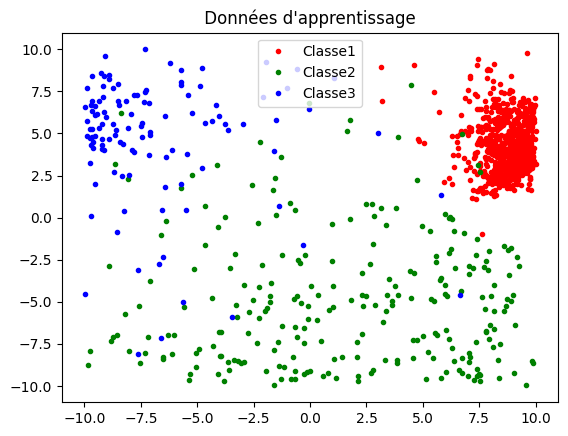

In [4]:
plt.figure()
plt.plot(Xa[0, La.flatten() == 1], Xa[1, La.flatten() == 1], '.r', label='Classe1')
plt.plot(Xa[0, La.flatten() == 2], Xa[1, La.flatten() == 2], '.g', label='Classe2')
plt.plot(Xa[0, La.flatten() == 3], Xa[1, La.flatten() == 3], '.b', label='Classe3')
plt.title(" Données d'apprentissage ")

plt.legend()
plt.show()

On applique maintenant notre algorithme KPPV sur les données test

In [ ]:
# Nombre de voisins pour kppv 
k = 5

N_test = Xt.shape[1]
label_test = np.zeros((N_test,1))

for i in range(N_test):
    label, index, rmax = kppv(Xa, La, Xt[:, i], k, C)
    label_test[i,0] = label


In [40]:
Xt[:, 0].shape

(2,)

On vérifie ensuite la correspondance entre les labels estimés et les labels théoriques de test.

In [32]:
correctes = (Lt == label_test).flatten()
nb_correctes = np.sum(correctes)
nb_erreurs = len(correctes) - nb_correctes
indices_mal_classes = np.where(~correctes)[0]

print("Nombre d'estimations correctes :", nb_correctes)
print("Nombre de ratés :", nb_erreurs)
print("Indices des points mal classifiés :", indices_mal_classes)

Nombre d'estimations correctes : 206
Nombre de ratés : 6
Indices des points mal classifiés : [  2   9 113 129 164 169]


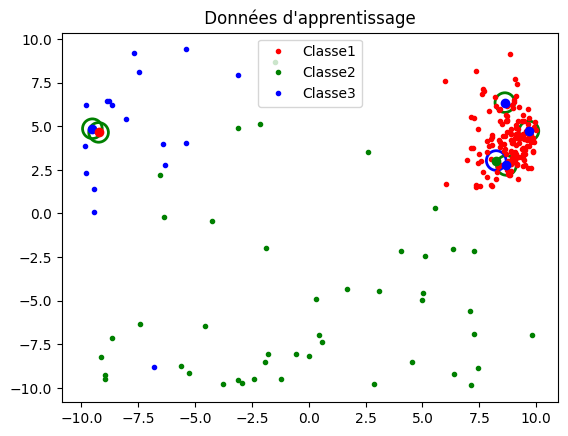

In [38]:
plt.figure()
plt.plot(Xt[0, Lt.flatten() == 1], Xt[1, Lt.flatten() == 1], '.r', label='Classe1')
plt.plot(Xt[0, Lt.flatten() == 2], Xt[1, Lt.flatten() == 2], '.g', label='Classe2')
plt.plot(Xt[0, Lt.flatten() == 3], Xt[1, Lt.flatten() == 3], '.b', label='Classe3')
plt.title(" Données d'apprentissage ")

# Affichage des points mal classifiés
for idx in indices_mal_classes:
    # Classe théorique et estimée pour ce point
    classe_theorique = Lt[idx][0]
    classe_estimee = label_test[idx][0]
    
    # Couleurs associées aux classes théorique et estimée
    couleurs = {1: 'r', 2: 'g', 3: 'b'}
    
    # Coordonnées du point mal classifié
    x_coord = Xa[0, idx]
    y_coord = Xa[1, idx]
    
    # Cercle de couleur théorique autour du point mal classifié
    plt.scatter(x_coord, y_coord, s=200, edgecolor=couleurs[classe_theorique], facecolor='none', linewidth=2)
    
    # Affichage du point en lui-même, avec la couleur de la classe estimée
    plt.plot(x_coord, y_coord, marker='o', color=couleurs[classe_estimee], markersize=6)

plt.legend()
plt.show()


Affichons les frontières de décisions.

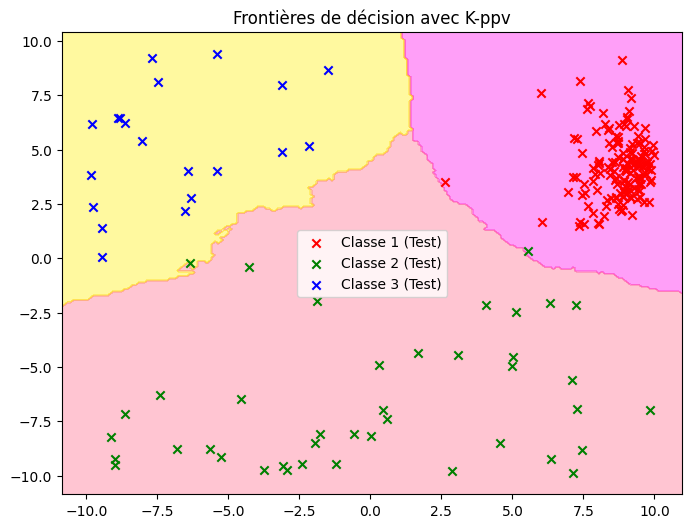

In [54]:
k = 34

# Création d'une grille pour calculer les frontières de décision
x_min, x_max = Xt[0, :].min() - 1, Xt[0, :].max() + 1
y_min, y_max = Xt[1, :].min() - 1, Xt[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Calcul des labels pour chaque point de la grille
Z = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        label, _, _ = kppv(Xa, La, point, k, C)
        Z[i, j] = label

# Tracé des frontières de décision
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='spring')

# Tracer les points de test
plt.scatter(Xt[0, label_test.flatten() == 1], Xt[1, label_test.flatten() == 1], c='r', marker='x', label='Classe 1 (Test)')
plt.scatter(Xt[0, label_test.flatten() == 2], Xt[1, label_test.flatten() == 2], c='g', marker='x', label='Classe 2 (Test)')
plt.scatter(Xt[0, label_test.flatten() == 3], Xt[1, label_test.flatten() == 3], c='b', marker='x', label='Classe 3 (Test)')

# Paramétrage du graphique
plt.title('Frontières de décision avec K-ppv')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()